# DEEP LEARNING PROJECT OF GROUP STUDENTS

## A project on breast cancer prediction using neural networks

Description : We are using the Wisconcin breast cancer data set to predict whether a woman has breast cancer or not. We have two classes "malign" and "benign" denoted as M and B respectively. We will be using pytorch which is an open-source machine learning library widely used for deep learning and artificial intelligence applications

## Importation of libraries

In [658]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

## Importation of dataset

In [659]:
from google.colab import files
uploaded = files.upload()

Saving new_dataset.csv to new_dataset (20).csv


In [660]:
import pandas as pd

# Input the name of your uploaded CSV file
df = pd.read_csv('new_dataset.csv')

## Exploratory Data Analysis

In [661]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,8.673870e+05,15.717589,13.925797,101.995130,761.692582,0.102033,0.089767,0.068461,0.059152,0.183014,...,19.256836,114.302611,922.806106,0.113516,0.197146,0.167213,0.135796,0.265638,0.074047,B
1,8.911840e+06,16.905135,21.017290,111.318854,881.374048,0.099496,0.136935,0.140562,0.073565,0.174297,...,28.868281,130.127282,1144.742002,0.134532,0.356464,0.386654,0.149743,0.266531,0.095744,M
2,8.716420e+05,10.657321,15.154916,67.497532,349.594549,0.095205,0.037134,0.007218,-0.001911,0.200137,...,19.196990,73.196632,408.299146,0.101096,0.070239,-0.006282,-0.004487,0.273664,0.067209,B
3,8.986900e+05,11.470000,16.030000,73.020000,402.700000,0.090760,0.058860,0.025870,0.023220,0.163400,...,20.790000,79.670000,475.800000,0.153100,0.112000,0.098230,0.065480,0.285100,0.087630,B
4,8.956330e+05,16.260000,21.880000,107.500000,826.800000,0.116500,0.128300,0.179900,0.079810,0.186900,...,25.210000,113.700000,975.200000,0.142600,0.211600,0.334400,0.104700,0.273600,0.079530,M


In [662]:
print(df.shape) # (rows, columns)

(1000, 32)


In [663]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  1.000000e+03  1000.000000   1000.000000     1000.000000  1000.000000   
mean   2.731363e+07    14.128353     19.286627       91.859537   653.905757   
std    1.115664e+08     3.410973      4.388549       23.549062   336.720516   
min    8.670000e+03     6.981000      9.702731       43.790000   143.500000   
25%    8.708242e+05    11.707500     16.137381       75.267500   420.868556   
50%    9.056830e+05    13.491438     18.765830       87.176827   560.096877   
75%    8.813129e+06    16.015422     21.820069      104.365962   794.350000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count      1000.000000       1000.000000     1000.000000          1000.000000   
mean          0.095540          0.100579        0.083825             0.047031   
std           0.013872          0.049156     

In [664]:
print(df['diagnosis'].value_counts()) # count the number of benign and malignant cases

diagnosis
B    643
M    357
Name: count, dtype: int64


## Separation of Characteristics and Feature

In [665]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'] #set the diagnosis variable as the target variable

## Convert string labels to numeric

In [666]:
le = LabelEncoder()
y = le.fit_transform(y)  # This will convert 'B' to 0 and 'M' to 1

## Separation of dataset into training set and test set

In [667]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [668]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Conversion of training and testing datasets from NumPy arrays (or other formats) into PyTorch tensors.

In [669]:
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
y_val_tensor = torch.FloatTensor(y_test).view(-1, 1)

In [670]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

## Creating the neural network architecture

This model is designed for binary classification tasks, with mechanisms for normalization and dropout to enhance training stability and reduce overfitting. The architecture consists of two hidden layers with 30 and 15 neurons, respectively, culminating in a single output neuron that produces a probability score.

In [671]:
class BreastCancerModel(nn.Module):
    def __init__(self):
        super(BreastCancerModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 30)
        self.bn1 = nn.BatchNorm1d(30)
        self.dropout1 = nn.Dropout(0.3)  # 30% dropout
        self.fc2 = nn.Linear(30, 15)
        self.bn2 = nn.BatchNorm1d(15)
        self.dropout2 = nn.Dropout(0.3)  # 30% dropout
        self.fc3 = nn.Linear(15, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.bn1(self.fc1(x))
        x = torch.relu(x)
        x = self.dropout1(x)
        x = self.bn2(self.fc2(x))
        x = torch.relu(x)
        x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        return x

## Model Initialization, Loss Function and Optimizer

Here, we initialize the breast cancer prediction model, define the loss function for measuring performance, and set up the Adam optimizer for training the model.

In [672]:
model = BreastCancerModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.01)

## Training the Model

In [673]:

# Lists to store loss and accuracy for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training the model
num_epochs = 150
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        predicted = (outputs >= 0.5).float()
        correct += predicted.eq(batch_y).sum().item()

    # Average training loss and accuracy
    train_loss = epoch_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)

    # Validate the model
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())
        val_predicted = (val_outputs >= 0.5).float()
        val_correct = val_predicted.eq(y_val_tensor).sum().item()
        val_accuracy = val_correct / len(y_val_tensor)
        val_accuracies.append(val_accuracy)

    # Print training and validation metrics for each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')



Epoch [1/150], Train Loss: 0.6222, Train Accuracy: 0.7188, Val Loss: 0.5591, Val Accuracy: 0.9500
Epoch [2/150], Train Loss: 0.5149, Train Accuracy: 0.8925, Val Loss: 0.4636, Val Accuracy: 0.9700
Epoch [3/150], Train Loss: 0.4506, Train Accuracy: 0.9250, Val Loss: 0.3988, Val Accuracy: 0.9600
Epoch [4/150], Train Loss: 0.4004, Train Accuracy: 0.9337, Val Loss: 0.3545, Val Accuracy: 0.9750
Epoch [5/150], Train Loss: 0.3522, Train Accuracy: 0.9363, Val Loss: 0.3028, Val Accuracy: 0.9800
Epoch [6/150], Train Loss: 0.3149, Train Accuracy: 0.9425, Val Loss: 0.2653, Val Accuracy: 0.9900
Epoch [7/150], Train Loss: 0.2864, Train Accuracy: 0.9513, Val Loss: 0.2256, Val Accuracy: 0.9850
Epoch [8/150], Train Loss: 0.2411, Train Accuracy: 0.9587, Val Loss: 0.2034, Val Accuracy: 0.9950
Epoch [9/150], Train Loss: 0.2192, Train Accuracy: 0.9688, Val Loss: 0.1822, Val Accuracy: 0.9900
Epoch [10/150], Train Loss: 0.2032, Train Accuracy: 0.9537, Val Loss: 0.1656, Val Accuracy: 0.9950
Epoch [11/150], Tra

This code segment trains the deep learning model for a specified number of epochs (150 in this case). During each epoch, it computes the loss and accuracy by performing forward and backward passes through the training data, updating the model's weights accordingly. The average training loss and accuracy for each epoch are stored in lists for later analysis and plotting.

## Loss Plot

A loss curve is a graphical representation of the loss value plotted against the number of training epochs (iterations). It typically shows two lines:

**Training Loss**: The training loss generally decreases steadily as training progresses. This trend indicates that the model is successfully learning from the training data.

**Validation Loss**: The validation loss initially decreases alongside the training loss, indicating that the model is generalizing well to the validation dataset.
After a certain number of epochs, however, the validation loss may start to increase while the training loss continues to decrease. This divergence is a key indicator of overfitting.

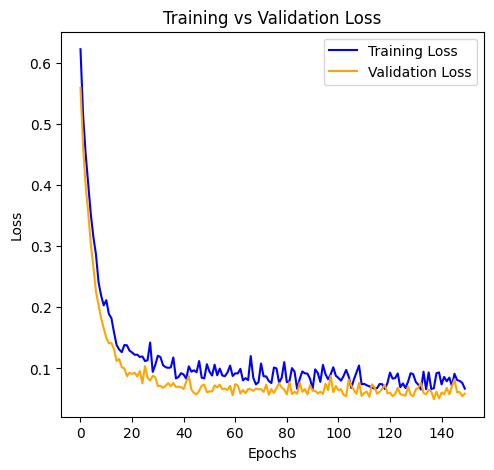

In [674]:
# Loss Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



We can see that our model is not overfitting since both curves are decreasing and almost converge to the same value

## Accuracy plot

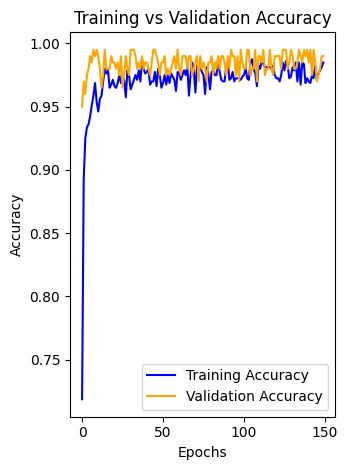

In [675]:
# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluation of the model

Test Accuracy: 99.00%
Precision: 1.00
Recall: 0.97
F1 Score: 0.98


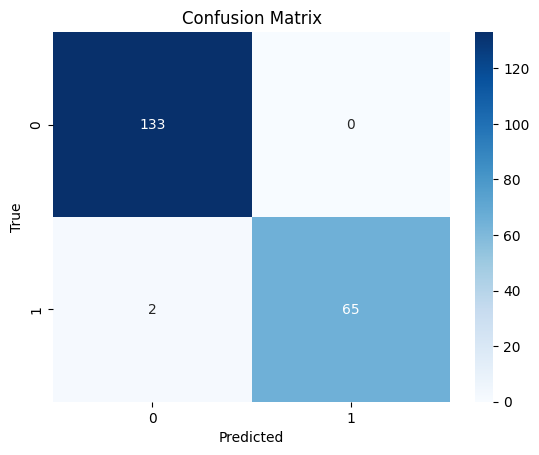

In [676]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_val_tensor)
    predicted = (test_outputs >= 0.5).float()
    accuracy = (predicted.eq(y_val_tensor).sum() / y_val_tensor.size(0)).item()
    # Calculate precision, recall, and F1 score
    precision = precision_score(y_val_tensor.numpy(), predicted.numpy())
    recall = recall_score(y_val_tensor.numpy(), predicted.numpy())
    f1 = f1_score(y_val_tensor.numpy(), predicted.numpy())

# Print test accuracy and additional metrics
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
# Print test accuracy
#print(f'Test Accuracy: {accuracy * 100:.2f}%')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_tensor.numpy(), predicted.numpy())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Interpretation of Metrics

Accuracy (99.00%):
This means that 99% of the predictions made by the model are correct. It's a strong indicator of overall model performance, especially in a binary classification scenario.

Precision (1.00):
A precision of 1.00 indicates that every positive prediction made by the model is correct. In the context of breast cancer diagnosis, this means that when the model predicts a tumor is malignant, it is indeed malignant all the time.

Recall (0.97):
A recall of 0.97 means that the model correctly identifies 97% of all actual positive cases (malignant tumors). This is crucial for medical applications, as missing a malignant tumor can have serious consequences.

F1 Score (0.98):
The F1 score is the harmonic mean of precision and recall. An F1 score of 0.98 suggests a good balance between precision and recall, indicating that the model is both precise in its positive predictions and effective at identifying positive cases.

Our model has an overall good performance based on the accuracy, F1 score, precision and recall

## Saving the Model

To export a trained PyTorch model, we save its state dictionary (which contains all the parameters of the model). The model will be saved as "breast_cancer_model.pth"

In [677]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'breast_cancer_model.pth')